# Combatting crime with surveillance

Crime prevention is the primary goal of CCTV (Dear et al., 2019). The underlying surveillance is framed as an effective instrument to combat crime rates through the continuous monitoring of public space by gathering data to anticipate potential safety threats (Ezzat et al., 2021). The practice is cost-efficient as multiple cameras are connected into a closed circuit, in which recordings are sent into a centralized monitoring room (Ratcliffe, 2006). In addition, spatial and temporal constraints are removed as the gaze is separated from face-to-face interactions. This gazing notion can discipline citizens into right behavior through the threat of always being watched and recorded (Norris, 2005). 

Overall, national governments could install more CCTV in order to combat crime and ensure public safety. This is beneficial through the psychological effects of video surveillance on citizen’s behavior as well as the presence of rapid enhancements in surveillance like biometric intelligence and computer vision (Norris, 2005).


## The Global Density of CCTV

Closed-Circuit Television emerged globally, with the density of cameras in public space varying across different countries. The bar graph illustrating the global density of CCTV cameras per 1,000 people reveals China as an extreme outlier. With over 200 million surveillance cameras in use, China's density far surpasses that of other nations, highlighting the potential scale and impact of extensive surveillance systems.

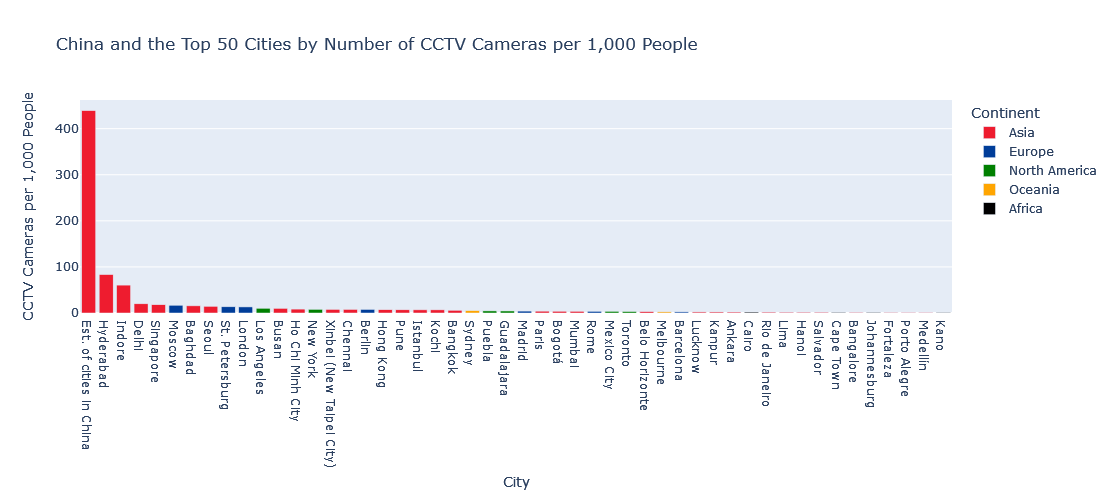

In [5]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

from dash import Dash, dcc, html
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

cctv = pd.read_csv("datasets/cctv.csv")

df = cctv

asia = {'Singapore', 'Myanmar', 'Yemen', 'Thailand', 'Philippines', 'Indonesia', 'Israel', 'Iraq', 'Pakistan', 'South Korea', 'India', 'Vietnam', 'Malaysia', 'Saudi Arabia', 'Japan', 'China', 'Taiwan', 'Afghanistan', 'Hong Kong', 'Turkey', 'Bangladesh', 'Iran'}
europe = {'Spain', 'Russia', 'Italy', 'Germany', 'United Kingdom'}
north_america = {'Mexico', 'United States', 'Dominican Republic', 'Canada'}
south_america = {'Mexico', 'United States', 'Dominican Republic', 'Canada'}
africa = {'Kenya', 'Egypt', 'Ethiopia', 'Nigeria', 'Madagascar', 'Burkina Faso', 'South Africa', 'Cameroon', 'Morocco', 'Uganda', 'Sudan', 'Tanzania', 'Angola', 'Senegal'}
oceania = {'Australia'}

# Map each country to its continent
def get_continent(country):
    if country in asia:
        return 'Asia'
    elif country in europe:
        return 'Europe'
    elif country in north_america:
        return 'North America'
    elif country in south_america:
        return 'South America'
    elif country in africa:
        return 'Africa'
    elif country in oceania:
        return 'Oceania'
    else:
        return 'Asia'

df['Continent'] = df['Country'].apply(get_continent)

# Exclude cities in China
df_non_china = df[df['Country'] != 'China']

# Calculate the mean value for cities in China
china_mean = df[df['Country'] == 'China']['# of CCTV Cameras per 1,000 People'].mean()

# Create a new DataFrame for the mean value
mean_china_df = pd.DataFrame({
    'City': ['Est. of cities in China'],
    '# of CCTV Cameras per 1,000 People': [china_mean],
    'Continent': ['Asia'],
    'Country': ['China']
})

# Concatenate the two DataFrames
final_df = pd.concat([df_non_china, mean_china_df], ignore_index=True)

# Sort the DataFrame by the number of CCTV cameras per 1,000 people
final_df = final_df.sort_values(by='# of CCTV Cameras per 1,000 People', ascending=False)

# Select the top 50 values
top_50_df = final_df.head(50)

# COLORS
# Define custom colors for each continent
color_map = {
    'Asia': 'rgb(238, 28, 47)',
    'Europe': 'rgb(0, 61, 153)',
    'North America': 'green',
    'South America': 'yellow',
    'Africa': 'black',
    'Oceania': 'orange',
    'Other': 'grey'
}

# Create the bar graph
fig = px.bar(top_50_df, x='City', y='# of CCTV Cameras per 1,000 People', color='Continent',
             title='China and the Top 50 Cities by Number of CCTV Cameras per 1,000 People',
             hover_data={'Country': True}, color_discrete_map=color_map,
             labels={'# of CCTV Cameras per 1,000 People': 'CCTV Cameras per 1,000 People'})

# Customize hover label formatting
fig.update_traces(
    hovertemplate='City: %{x}<br>Country: %{customdata[0]}<br># of CCTV Cameras per 1000 people: %{y}'
)


fig.update_layout(
    height = 500,
    xaxis={'categoryorder':'total descending'}
)

fig.show()

China's extensive use of CCTV has complex implications for crime prevention and civil liberties. While a high volume of cameras can deter crime by increasing the likelihood of being caught, the focus on surveillance for control raises concerns about authoritarianism and the balance between security and freedom. Scholars argue that, beyond tracking and monitoring, surveillance in China exercises social, political, and cultural control (Lyon, 2003; Foucault, 2012; Galič et al., 2017).

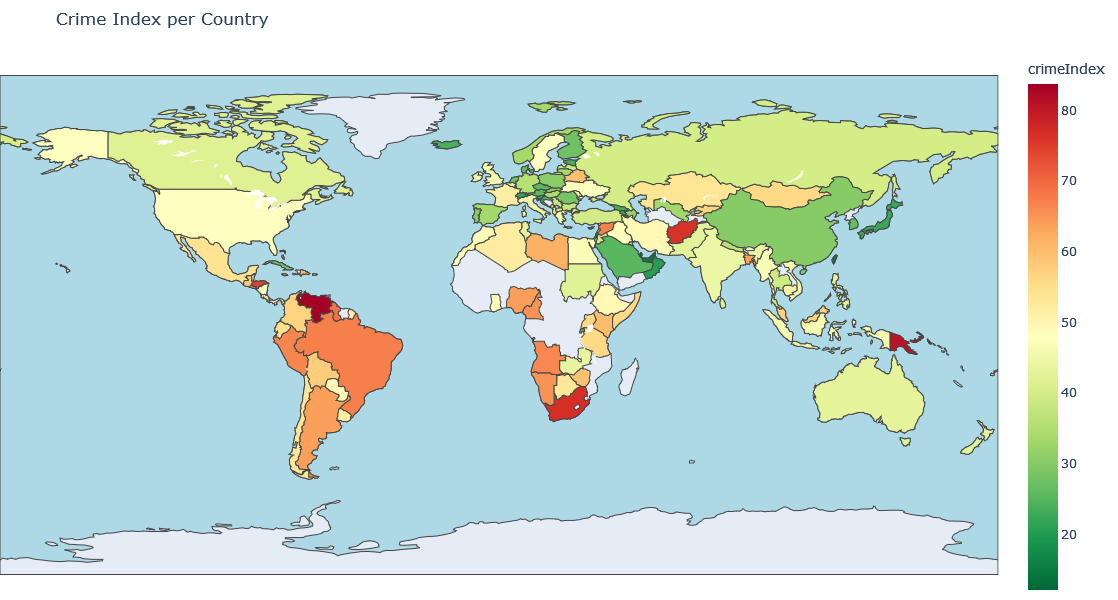

In [6]:
# Create Choropleth
crime = pd.read_csv("datasets/crime-rate-by-country-2023.csv")

fig = px.choropleth(crime, 
                    locations='country', 
                    locationmode='country names', 
                    color='crimeIndex',
                    color_continuous_scale='RdYlGn_r',
                    title='Crime Index per Country')

# Initialize the Dash app
app = Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    dcc.Graph(id='crime-map', figure=fig)
])

fig.update_layout(
    autosize=False,
    width=1000,   # Adjust the width as needed
    height=600,   # Adjust the height as needed
    geo=dict(
        bgcolor='lightblue'  # Set the sea color to blue
    ),
    margin=dict(l=0, r=0, t=50, b=0)  # Adjust margins as needed
)

fig.show()

## Relation Between Number of CCTV Cameras and Gross National Income

The bar graph below highlights the relationship between the density of CCTV cameras and Gross National Income (GNI) per capita in various countries. Wealthier nations tend to have more CCTV cameras per 1,000 people, reflecting their greater economic resources for public safety and security. This investment in advanced surveillance systems is a crucial part of these countries' crime prevention strategies. Higher GNI correlates with increased funding for technology, both as a security tool and a symbol of technological advancement and status (Norris, 2005; Lyon, 2003).

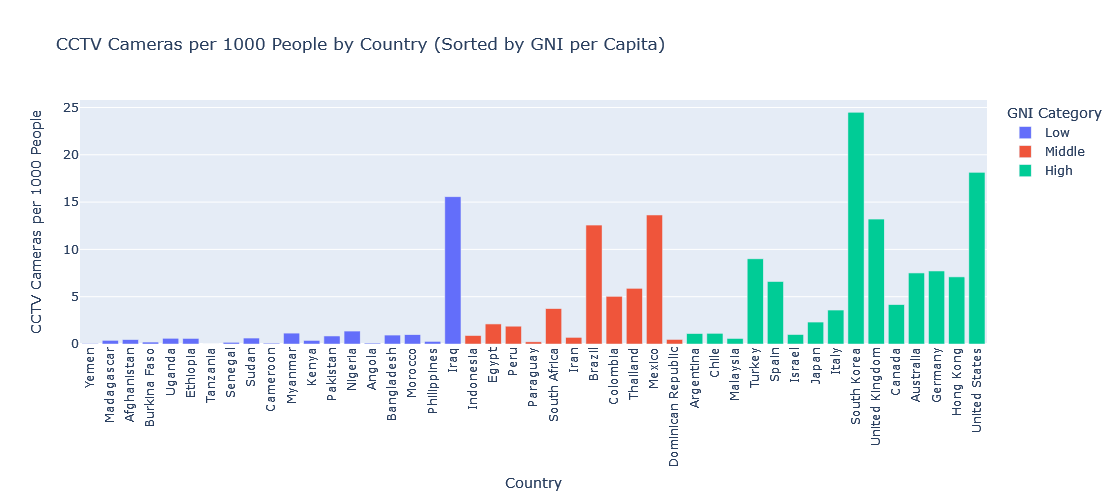

In [7]:
# Load the data (replace with the actual file paths)
df_cctv = pd.read_csv('datasets/cctv.csv')
df_hdi = pd.read_csv('datasets/Human Development Index.csv')

# Select relevant columns and rename for clarity
df_hdi = df_hdi[['Country', 'Gross National Income Per Capita (2021)']]
df_cctv = df_cctv[['Country', '# of CCTV Cameras', '# of People (2023)']]

# Clean the data: handle missing values
df_hdi.dropna(subset=['Gross National Income Per Capita (2021)'], inplace=True)
df_cctv.dropna(subset=['# of CCTV Cameras', '# of People (2023)'], inplace=True)

# Convert '# of CCTV Cameras' and '# of People (2023)' columns to integers (remove commas)
df_cctv['# of CCTV Cameras'] = df_cctv['# of CCTV Cameras'].str.replace(',', '').astype(int)
df_cctv['# of People (2023)'] = df_cctv['# of People (2023)'].str.replace(',', '').astype(int)

# Calculate the number of CCTV cameras per 1000 people
df_cctv['CCTV Cameras per 1000 People'] = df_cctv['# of CCTV Cameras'] / df_cctv['# of People (2023)'] * 1000

# Group by country and calculate the total number of cameras and the number of CCTV cameras per 1000 people
total_cameras_per_land = df_cctv.groupby('Country', as_index=False).agg({
    '# of CCTV Cameras': 'sum',
    'CCTV Cameras per 1000 People': 'sum'
})

# Merge the DataFrames on 'Country'
merged_df = pd.merge(total_cameras_per_land, df_hdi, on='Country')

# Exclude specific countries because of outliers or no information
excluded_countries = ['China', 'India', 'Saudi Arabia']
merged_df = merged_df[~merged_df['Country'].isin(excluded_countries)]

# Categorize GNI per Capita into low, middle, high
gni_bins = [0, 10000, 20000, float('inf')]
gni_labels = ['Low', 'Middle', 'High']
merged_df['GNI Category'] = pd.cut(merged_df['Gross National Income Per Capita (2021)'], bins=gni_bins, labels=gni_labels)

# Sort the merged data by GNI per Capita
merged_df_sorted = merged_df.sort_values(by='Gross National Income Per Capita (2021)')

# Create the interactive bar chart
fig = px.bar(
    merged_df_sorted,
    x='Country',
    y='CCTV Cameras per 1000 People',
    color='GNI Category',
    hover_data=['# of CCTV Cameras', 'Gross National Income Per Capita (2021)'],
    labels={'CCTV Cameras per 1000 People': 'CCTV Cameras per 1000 People', 'Gross National Income Per Capita (2021)': 'GNI per Capita'},
    title='CCTV Cameras per 1000 People by Country (Sorted by GNI per Capita)'
)

# Update the layout to improve readability
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='CCTV Cameras per 1000 People',
    xaxis_tickangle=-90,
    yaxis=dict(tickmode='linear', tick0=0, dtick=5),
    hovermode='closest',
    height = 500
)

# Show the plot
fig.show()

In contrast, countries with lower GNI face greater challenges in crime prevention due to limited economic capital and less efficient policing strategies. The lack of available technology hampers their ability to complement traditional crime-fighting methods, making it more difficult to maintain safety and stability. Therefore, it might be beneficial to discover global solutions for these countries to find ways to invest in local CCTV technologies to promote safe and stable societies.